In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
goog = pd.read_csv('GOOG_Train.csv')
amzn = pd.read_csv('AMZN.csv')
apple = pd.read_csv('AAPL.csv') 

In [3]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-04-19,94.311501,95.641510,93.663925,95.342636,95.342636,16923100
1,2005-04-20,98.919228,99.875641,97.589211,98.680122,98.680122,31018800
2,2005-04-21,99.835793,102.117241,99.287842,101.728699,101.728699,35636800
3,2005-04-22,111.033821,111.581764,106.729950,107.502052,107.502052,66659100
4,2005-04-25,108.503304,111.950386,108.353867,111.347641,111.347641,39828600


In [4]:
goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3.776000e+03
mean,524.101598,528.915344,519.075810,524.148991,524.148991,6.435381e+06
std,350.963099,354.061581,348.108692,351.319744,351.319744,7.288053e+06
min,94.311501,95.641510,93.663925,95.342636,95.342636,7.900000e+03
25%,247.629322,249.949375,244.888347,247.812385,247.812385,1.704275e+06
50%,348.864869,352.620789,345.602097,348.546066,348.546066,4.093200e+06
75%,756.764984,764.276489,750.002502,758.190018,758.190018,8.139850e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,8.254150e+07


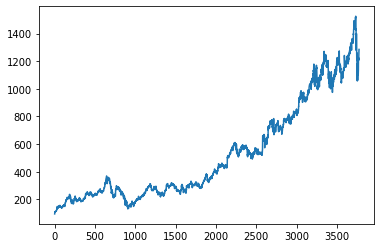

In [5]:
goog['Open'].plot(label='Google Opening Price')

Text(0, 0.5, 'Total Volume Traded')

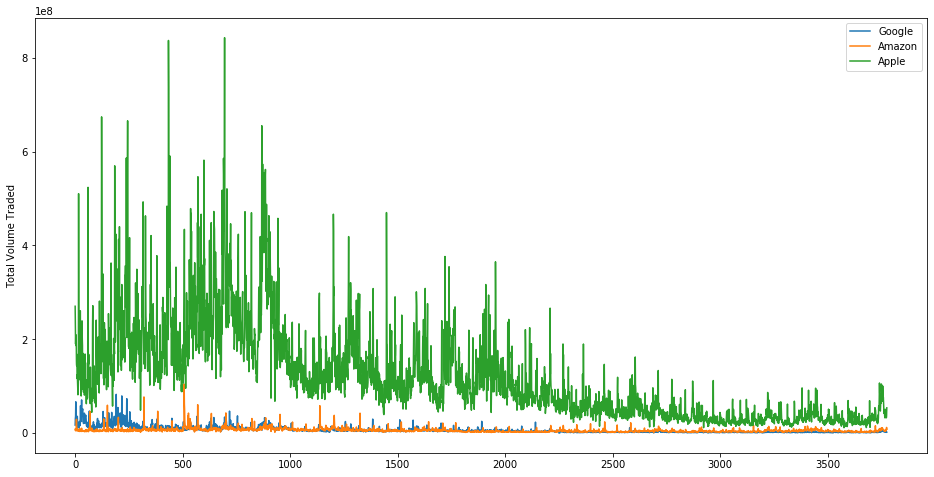

In [6]:
goog['Volume'].plot(label='Google',figsize=(16,8))
amzn['Volume'].plot(label='Amazon')
apple['Volume'].plot(label='Apple')
plt.legend()
plt.ylabel('Total Volume Traded')

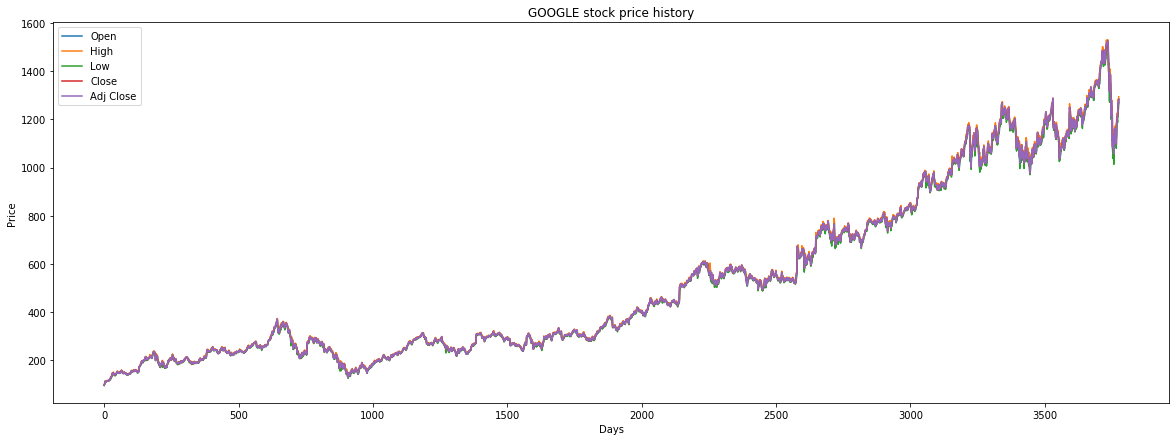

In [7]:
plt.figure(figsize=(20,7))
plt.plot(goog["Open"])
plt.plot(goog["High"])
plt.plot(goog["Low"])
plt.plot(goog["Close"])
plt.plot(goog["Adj Close"])
plt.title('GOOGLE stock price history')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close', 'Adj Close'], loc='upper left')
plt.show()


In [8]:
print("Missing Values Check\n", goog.isna().sum())

Missing Values Check
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
dataset_train = pd.read_csv('GOOG_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
print(training_set_scaled)

[[0.        ]
 [0.00322048]
 [0.00386109]
 ...
 [0.80467705]
 [0.82458956]
 [0.83210306]]


In [12]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mae')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0260
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0130
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0111
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0106
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0102
Epoch 6/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0101
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0094
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0097
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0085
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0084
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0085
Epoch 12/100
1198/1198 [==============================] - 3s 2ms/step - lo

1198/1198 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 98/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 99/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0046
Epoch 100/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0044


[[[0.9738391 ]
  [0.9779977 ]
  [0.93425169]
  ...
  [0.80467705]
  [0.82458956]
  [0.83210306]]

 [[0.9779977 ]
  [0.93425169]
  [0.94263885]
  ...
  [0.82458956]
  [0.83210306]
  [0.47841654]]

 [[0.93425169]
  [0.94263885]
  [0.95368198]
  ...
  [0.83210306]
  [0.47841654]
  [0.48509132]]

 ...

 [[0.99296181]
  [1.        ]
  [0.99785432]
  ...
  [0.508813  ]
  [0.51392917]
  [0.51965341]]

 [[1.        ]
  [0.99785432]
  [0.98809029]
  ...
  [0.51392917]
  [0.51965341]
  [0.51748672]]

 [[0.99785432]
  [0.98809029]
  [0.93083391]
  ...
  [0.51965341]
  [0.51748672]
  [0.50347318]]]
[[1180.6548 ]
 [ 787.2381 ]
 [ 650.5415 ]
 [ 677.1779 ]
 [ 740.44055]
 [ 773.8615 ]
 [ 771.97156]
 [ 755.03   ]
 [ 744.2907 ]
 [ 742.2748 ]
 [ 745.6574 ]
 [ 750.5755 ]
 [ 755.56213]
 [ 761.4396 ]
 [ 765.87024]
 [ 779.36646]
 [ 791.22064]
 [ 800.15814]
 [ 799.4726 ]
 [ 782.5979 ]]


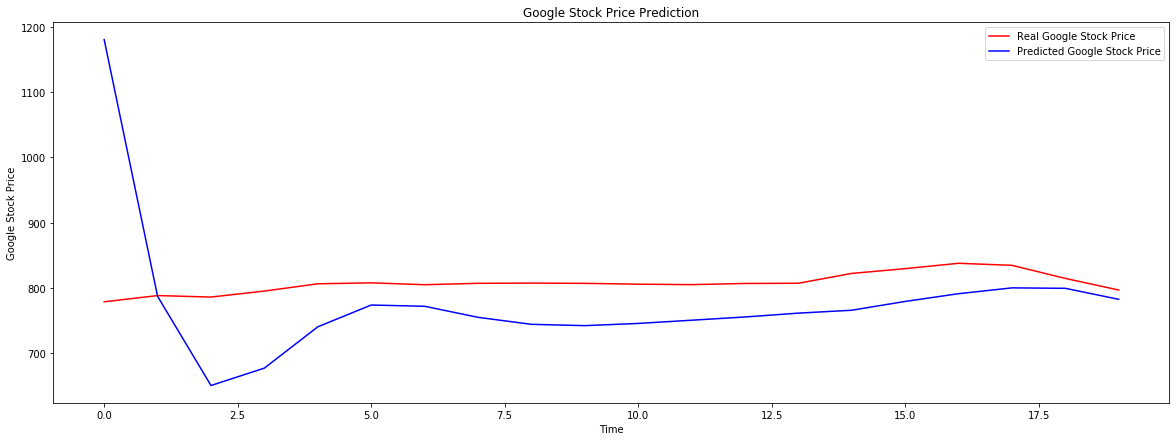

In [19]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(X_test)
print(predicted_stock_price)

# Visualising the results
plt.figure(figsize=(20,7))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()